Convolution and transfer functions
===================

So far, we have calculated the response of systems by finding the Laplace transforms of the input and the system (transfer function), multiplying them and then finding the inverse Laplace transform of the result.

<img width="200em" src="../../assets/transfer_function_block_diagram.png">

We have been using the idea that, with the nomenclature of the diagram shown above, 

$$ Y(s) = G(s) U(s). \qquad(1) $$

But, if we follow the nomenclature, then $\mathcal{L}\{u(t)\} = U(s)$ and $\mathcal{L}\{y(t)\} = Y(s)$ and similarly there is some $g(t)$ such that $\mathcal{L}\{g(t)\} = G(s)$. So far we have not really used $g(t)$ explicitly, but we know that the time-domain version of equation 1 is given by

$$ y(t) = (g * u)(t) $$

where $*$ denotes [convolution](https://en.wikipedia.org/wiki/Convolution), which is defined by the following integral:

$$ (g * u)(t) = \int_{-\infty}^\infty g(\tau) u(t - \tau) \mathrm{d} \tau =  \int_{-\infty}^\infty u(\tau) g(t - \tau) \mathrm{d} \tau$$

Since we are primarily concerned with functions where both $g(t)=0$ and $u(t)=0$ for $t<0$, the integral bounds can be written as

$$ (g * u)(t) = \int_0^t g(\tau) u(t - \tau) \mathrm{d} \tau =  \int_0^t u(\tau) g(t - \tau) \mathrm{d} \tau$$


This gives us a whole new way to think about the response of a system to an input. Let's revisit the first order step response by thinking about convolution.

In [1]:
import sympy
sympy.init_printing()
%matplotlib inline

In [2]:
s = sympy.Symbol('s')
t = sympy.Symbol('t', real=True)
tau = sympy.Symbol('tau', real=True, positive=True)

We start by considering the first order transfer function:

In [3]:
G = 1/(tau*s + 1)

We can interpret g(t) as the *impulse response* of the system, since $\mathcal{L}\{\delta(t)\}=1$ (in words, the Laplace transform of the Dirac delta is one). So, if $u(t)=\delta(t)$, then $U(s)=1$, so $Y(s)=G(s)$ and therefore $y(t)=g(t)$. 

This is what the impulse response of the first order system looks like with $\tau=1$:

In [4]:
g = sympy.inverse_laplace_transform(G.subs({tau: 1}), s, t)
g

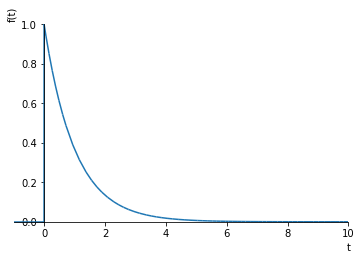

In [5]:
sympy.plot(g, (t, -1, 10))

Earlier, we calculated the step response of the system by calculating $U(s)=\frac{1}{s}$, therefore $Y(s) = \frac{G(s)}{s}$ and then calculating the inverse Laplace:

In [6]:
stepresponse = sympy.inverse_laplace_transform(G.subs({tau: 1})/s, s, t)
stepresponse

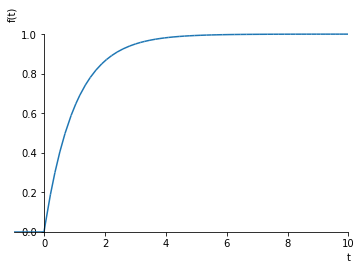

In [7]:
sympy.plot(stepresponse, (t, -1, 10), ylim=(0, 1.1))

We can get the same result by convolving the unit step function with the impulse response. Sympy doesn't handle the improper integral correctly here (as of the below version number):

In [8]:
sympy.__version__

'1.4'

In [9]:
u = sympy.Heaviside(t)

In [10]:
product = g.subs({t: tau})*u.subs({t: t - tau})

In [11]:
sympy.integrate(product, (tau, -sympy.oo, sympy.oo))

But it does appear to work for the rewritten integral bounds:

In [12]:
sympy.integrate(product, (tau, 0, t))

### Numeric convolution

sympy cannot evaluate the convolution integral for all impulse response functions, so it is often useful to do the convolution numerically.

The `numpy.convolve` function calculates the discrete convolution, that is

$$ (g*u)[n] = \sum_{m = -\infty}^{\infty} g[m] u[n - m] $$

Let's compare that to the continuous convolution integral:

$$(g*u)(t)\int_{-\infty}^{\infty} g(\tau) u(t - \tau) \mathrm{d} \tau$$

If we discretize this integral to a [Riemann sum](https://en.wikipedia.org/wiki/Riemann_sum) with a discrete time step $\Delta t$, we obtain

\begin{align}
(g*u)(n\Delta t) &\approx \sum_{m = -\infty}^{\infty} g(m\Delta t) u(n\Delta t - m\Delta t) \Delta t \\
 &= \sum_{m = -\infty}^{\infty} g[m] u[n - m] \Delta t \\
 &= (g*u)[n] \Delta t
 \\
\end{align}


In [13]:
import numpy
import matplotlib.pyplot as plt

In [14]:
ts = numpy.linspace(0, 10, 200)
Δt = ts[1]  # space between timesteps 

We evaluate the impulse response:

In [15]:
gt = numpy.exp(-ts)

In [16]:
ut = numpy.ones_like(ts)

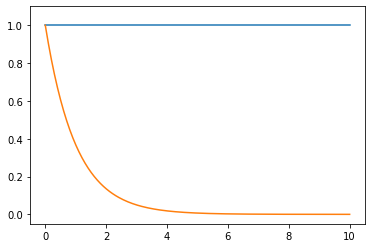

In [17]:
plt.plot(ts, ut, ts, gt)
plt.ylim(ymax=1.1)

Also notice that the default behaviour is for the convolution to be calculated over a larger time then originally, so this contains the step response up and down

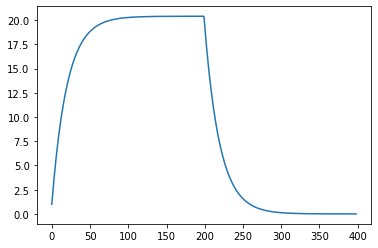

In [18]:
full_convolution = numpy.convolve(gt, ut)
plt.plot(full_convolution)

To get the correct integral and just the first part, we can do this:

In [19]:
yt = full_convolution[:len(ts)]*Δt

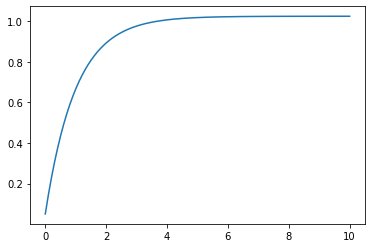

In [20]:
plt.plot(ts, yt)

Notice that this allows us to calculate the response of a system to an arbitrarily complex input numerically. It also gives us a whole new way to think about how a system will behave by thinking about what its impulse response looks like.